# **Identifying Key Entities in Recipe Data**


**Business Objective**:
The goal of this assignment is to train a Named Entity Recognition (NER) model using Conditional Random Fields (CRF) to extract key entities from recipe data. The model will classify words into predefined categories such as ingredients, quantities and units, enabling the creation of a structured database of recipes and ingredients that can be used to power advanced features in recipe management systems, dietary tracking apps, or e-commerce platforms.

### **Data Description**
The given data is in JSON format, representing a **structured recipe ingredient list** with **Named Entity Recognition (NER) labels**. Below is a breakdown of the data fields:

```json
[
    {
        "input": "6 Karela Bitter Gourd Pavakkai Salt 1 Onion 3 tablespoon Gram flour besan 2 teaspoons Turmeric powder Haldi Red Chilli Cumin seeds Jeera Coriander Powder Dhania Amchur Dry Mango Sunflower Oil",
        "pos": "quantity ingredient ingredient ingredient ingredient ingredient quantity ingredient quantity unit ingredient ingredient ingredient quantity unit ingredient ingredient ingredient ingredient ingredient ingredient ingredient ingredient ingredient ingredient ingredient ingredient ingredient ingredient ingredient ingredient"
    },
    {
      "input": "2-1/2 cups rice cooked 3 tomatoes teaspoons BC Belle Bhat powder 1 teaspoon chickpea lentils 1/2 cumin seeds white urad dal mustard green chilli dry red 2 cashew or peanuts 1-1/2 tablespoon oil asafoetida",
      "pos": "quantity unit ingredient ingredient quantity ingredient unit ingredient ingredient ingredient ingredient quantity unit ingredient ingredient quantity ingredient ingredient ingredient ingredient ingredient ingredient ingredient ingredient ingredient ingredient quantity ingredient ingredient ingredient quantity unit ingredient ingredient"
    }
]


| **Key**  | **Description**  |
|----------|-----------------|
| `input`  | Contains a raw ingredient list from a recipe. |
| `pos`    | Represents the corresponding part-of-speech (POS) tags or NER labels, identifying quantities, ingredients, and units. |


## **1** Import libraries

#### **1.1** Installation of sklearn-crfsuite

sklearn-crfsuite is a Python wrapper for CRFsuite, a fast and efficient implementation of Conditional Random Fields (CRFs). It is designed to integrate seamlessly with scikit-learn for structured prediction tasks such as Named Entity Recognition (NER), Part-of-Speech (POS) tagging, and chunking.

In [1]:
# installation of sklearn_crfsuite
!pip install sklearn_crfsuite==0.5.0

#### **1.2** Import necessary libraries

In [2]:
# Import warnings
import warnings
warnings.filterwarnings('ignore')

In [1]:
# Import necessary libraries
import json  # For handling JSON data
import pandas as pd  # For data manipulation and analysis
import re  # For regular expressions (useful for text preprocessing)
import matplotlib.pyplot as plt  # For visualisation
import seaborn as sns  # For advanced data visualisation
import sklearn_crfsuite  # CRF (Conditional Random Fields) implementation for sequence modeling
import numpy as np  # For numerical computations
# Saving and loading machine learning models
import joblib
import random
import spacy
from IPython.display import display, Markdown # For displaying well-formatted output

from fractions import Fraction  # For handling fractional values in numerical data
# Importing tools for feature engineering and model training
from collections import Counter  # For counting occurrences of elements in a list
from sklearn.model_selection import train_test_split  # For splitting dataset into train and test sets
from sklearn_crfsuite import metrics  # For evaluating CRF models
from sklearn_crfsuite.metrics import flat_classification_report
from sklearn.utils.class_weight import compute_class_weight
from collections import Counter
from sklearn.metrics import confusion_matrix

In [2]:
# Ensure pandas displays full content
pd.set_option('display.max_colwidth', None)
pd.set_option('display.expand_frame_repr', False)

## **2** Data Ingestion and Preparation <font color = red>[25 marks]</font> <br>

#### **2.1** *Read Recipe Data from Dataframe and prepare the data for analysis* <font color = red>[12 marks]</font> <br>
Read the data from JSON file, print first five rows and describe the dataframe

##### **2.1.1** **Define a *load_json_dataframe* function** <font color = red>[7 marks]</font> <br>

Define a function that takes path of the ingredient_and_quantity.json file and reads it, convert it into dataframe - df and return it.

In [ ]:
# define a function to load json file to a dataframe
def load_json_dataframe(file_path):
    df = pd.read_json(file_path)
    return df



##### **2.1.2** **Execute the *load_json_dataframe* function** <font color = red>[2 marks]</font> <br>

In [4]:
# read the json file by giving the file path and create a dataframe
file_path = 'ingredient_and_quantity.json'
df = load_json_dataframe(file_path)
df.head()


,input,pos
0,6 Karela Bitter Gourd Pavakkai Salt 1 Onion 3 tablespoon Gram flour besan 2 teaspoons Turmeric powder Haldi Red Chilli Cumin seeds Jeera Coriander Powder Dhania Amchur Dry Mango Sunflower Oil,quantity ingredient ingredient ingredient ingredient ingredient quantity ingredient quantity unit ingredient ingredient ingredient quantity unit ingredient ingredient ingredient ingredient ingredient ingredient ingredient ingredient ingredient ingredient ingredient ingredient ingredient ingredient ingredient ingredient
1,2-1/2 cups rice cooked 3 tomatoes teaspoons BC Belle Bhat powder 1 teaspoon chickpea lentils 1/2 cumin seeds white urad dal mustard green chilli dry red 2 cashew or peanuts 1-1/2 tablespoon oil asafoetida,quantity unit ingredient ingredient quantity ingredient unit ingredient ingredient ingredient ingredient quantity unit ingredient ingredient quantity ingredient ingredient ingredient ingredient ingredient ingredient ingredient ingredient ingredient ingredient quantity ingredient ingredient ingredient quantity unit ingredient ingredient
2,1-1/2 cups Rice Vermicelli Noodles Thin 1 Onion sliced 1/2 cup Carrots Gajjar chopped 1/3 Green peas Matar 2 Chillies 1/4 teaspoon Asafoetida hing Mustard seeds White Urad Dal Split Ghee sprig Curry leaves Salt Lemon juice,quantity unit ingredient ingredient ingredient ingredient quantity ingredient ingredient quantity unit ingredient ingredient ingredient quantity ingredient ingredient ingredient quantity ingredient quantity unit ingredient ingredient ingredient ingredient ingredient ingredient ingredient ingredient ingredient unit ingredient ingredient ingredient ingredient ingredient
3,500 grams Chicken 2 Onion chopped 1 Tomato 4 Green Chillies slit inch Ginger finely 6 cloves Garlic 1/2 teaspoon Turmeric powder Haldi Garam masala tablespoon Sesame Gingelly Oil 1/4 Methi Seeds Fenugreek Coriander Dhania Dry Red Fennel seeds Saunf cups Sorrel Leaves Gongura picked and,quantity unit ingredient quantity ingredient ingredient quantity ingredient quantity ingredient ingredient ingredient unit ingredient ingredient quantity unit ingredient quantity unit ingredient ingredient ingredient ingredient ingredient unit ingredient ingredient ingredient quantity ingredient ingredient ingredient ingredient ingredient ingredient ingredient ingredient ingredient ingredient unit ingredient ingredient ingredient ingredient ingredient
4,1 tablespoon chana dal white urad 2 red chillies coriander seeds 3 inches ginger onion tomato Teaspoon mustard asafoetida sprig curry,quantity unit ingredient ingredient ingredient ingredient quantity ingredient ingredient ingredient ingredient quantity unit ingredient ingredient ingredient unit ingredient ingredient unit ingredient


##### **2.1.3** **Describe the dataframe** <font color = red>[3 marks]</font> <br>

Print first five rows of dataframe along with dimensions. Display the information of dataframe

In [5]:
# display first five rows of the dataframe - df
print(df.head(5))


                                                                                                                                                                                                                                                                                            input                                                                                                                                                                                                                                                                                                                                                                                                                                                                      pos
0                                                                                                 6 Karela Bitter Gourd Pavakkai Salt 1 Onion 3 tablespoon Gram flour besan 2 teaspoons Turmeric powder Haldi Red Chilli Cumin seeds Jeera Coriander Powder D

In [6]:
# print the dimensions of dataframe - df
print(df.shape)


(285, 2)


In [14]:
# print the information of the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 285 entries, 0 to 284
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   input   285 non-null    object
 1   pos     285 non-null    object
dtypes: object(2)
memory usage: 4.6+ KB


#### **2.2** *Recipe Data Manipulation* <font color = red>[13 marks]</font> <br>
Create derived metrics in dataframe and provide insights of the dataframe

##### **2.2.1** **Create input_tokens and pos_tokens columns by splitting the input and pos from the dataframe** <font color = red>[3 marks]</font> <br>
Split the input and pos into input_tokens and pos_tokens in the dataframe and display it in the dataframe

In [7]:
# Tokenize input
df['input_tokens'] = df['input'].apply(lambda x: x.split())
# Tokenize POS
df['pos_tokens'] = df['pos'].apply(lambda x: x.split())

In [8]:
# display first five rows of the dataframe - df
df.head(5)

,input,pos,input_tokens,pos_tokens
0,6 Karela Bitter Gourd Pavakkai Salt 1 Onion 3 tablespoon Gram flour besan 2 teaspoons Turmeric powder Haldi Red Chilli Cumin seeds Jeera Coriander Powder Dhania Amchur Dry Mango Sunflower Oil,quantity ingredient ingredient ingredient ingredient ingredient quantity ingredient quantity unit ingredient ingredient ingredient quantity unit ingredient ingredient ingredient ingredient ingredient ingredient ingredient ingredient ingredient ingredient ingredient ingredient ingredient ingredient ingredient ingredient,"[6, Karela, Bitter, Gourd, Pavakkai, Salt, 1, Onion, 3, tablespoon, Gram, flour, besan, 2, teaspoons, Turmeric, powder, Haldi, Red, Chilli, Cumin, seeds, Jeera, Coriander, Powder, Dhania, Amchur, Dry, Mango, Sunflower, Oil]","[quantity, ingredient, ingredient, ingredient, ingredient, ingredient, quantity, ingredient, quantity, unit, ingredient, ingredient, ingredient, quantity, unit, ingredient, ingredient, ingredient, ingredient, ingredient, ingredient, ingredient, ingredient, ingredient, ingredient, ingredient, ingredient, ingredient, ingredient, ingredient, ingredient]"
1,2-1/2 cups rice cooked 3 tomatoes teaspoons BC Belle Bhat powder 1 teaspoon chickpea lentils 1/2 cumin seeds white urad dal mustard green chilli dry red 2 cashew or peanuts 1-1/2 tablespoon oil asafoetida,quantity unit ingredient ingredient quantity ingredient unit ingredient ingredient ingredient ingredient quantity unit ingredient ingredient quantity ingredient ingredient ingredient ingredient ingredient ingredient ingredient ingredient ingredient ingredient quantity ingredient ingredient ingredient quantity unit ingredient ingredient,"[2-1/2, cups, rice, cooked, 3, tomatoes, teaspoons, BC, Belle, Bhat, powder, 1, teaspoon, chickpea, lentils, 1/2, cumin, seeds, white, urad, dal, mustard, green, chilli, dry, red, 2, cashew, or, peanuts, 1-1/2, tablespoon, oil, asafoetida]","[quantity, unit, ingredient, ingredient, quantity, ingredient, unit, ingredient, ingredient, ingredient, ingredient, quantity, unit, ingredient, ingredient, quantity, ingredient, ingredient, ingredient, ingredient, ingredient, ingredient, ingredient, ingredient, ingredient, ingredient, quantity, ingredient, ingredient, ingredient, quantity, unit, ingredient, ingredient]"
2,1-1/2 cups Rice Vermicelli Noodles Thin 1 Onion sliced 1/2 cup Carrots Gajjar chopped 1/3 Green peas Matar 2 Chillies 1/4 teaspoon Asafoetida hing Mustard seeds White Urad Dal Split Ghee sprig Curry leaves Salt Lemon juice,quantity unit ingredient ingredient ingredient ingredient quantity ingredient ingredient quantity unit ingredient ingredient ingredient quantity ingredient ingredient ingredient quantity ingredient quantity unit ingredient ingredient ingredient ingredient ingredient ingredient ingredient ingredient ingredient unit ingredient ingredient ingredient ingredient ingredient,"[1-1/2, cups, Rice, Vermicelli, Noodles, Thin, 1, Onion, sliced, 1/2, cup, Carrots, Gajjar, chopped, 1/3, Green, peas, Matar, 2, Chillies, 1/4, teaspoon, Asafoetida, hing, Mustard, seeds, White, Urad, Dal, Split, Ghee, sprig, Curry, leaves, Salt, Lemon, juice]","[quantity, unit, ingredient, ingredient, ingredient, ingredient, quantity, ingredient, ingredient, quantity, unit, ingredient, ingredient, ingredient, quantity, ingredient, ingredient, ingredient, quantity, ingredient, quantity, unit, ingredient, ingredient, ingredient, ingredient, ingredient, ingredient, ingredient, ingredient, ingredient, unit, ingredient, ingredient, ingredient, ingredient, ingredient]"
3,500 grams Chicken 2 Onion chopped 1 Tomato 4 Green Chillies slit inch Ginger finely 6 cloves Garlic 1/2 teaspoon Turmeric powder Haldi Garam masala tablespoon Sesame Gingelly Oil 1/4 Methi Seeds Fenugreek Coriander Dhania Dry Red Fennel seeds Saunf cups Sorrel Leaves Gongura picked and,quantity unit ingredient quantity ingredient ingredient quantity ingredient quantity ingredient ingredient ingredient unit ingredient ingredient qua

##### **2.2.2** **Provide the length for input_tokens and pos_tokens and validate their length** <font color = red>[2 marks]</font> <br>

Create input_length and pos_length columns in the dataframe and validate both the lengths. Check for the rows that are unequal in input and pos length


In [ ]:
# create input_length and pos_length columns for the input_tokens and pos-tokens
df['input_length'] = df['input_tokens'].apply(len)
df['pos_length'] = df['pos_tokens'].apply(len)
df.head()

,input,pos,input_tokens,pos_tokens,input_length,pos_length
0,6 Karela Bitter Gourd Pavakkai Salt 1 Onion 3 tablespoon Gram flour besan 2 teaspoons Turmeric powder Haldi Red Chilli Cumin seeds Jeera Coriander Powder Dhania Amchur Dry Mango Sunflower Oil,quantity ingredient ingredient ingredient ingredient ingredient quantity ingredient quantity unit ingredient ingredient ingredient quantity unit ingredient ingredient ingredient ingredient ingredient ingredient ingredient ingredient ingredient ingredient ingredient ingredient ingredient ingredient ingredient ingredient,"[6, Karela, Bitter, Gourd, Pavakkai, Salt, 1, Onion, 3, tablespoon, Gram, flour, besan, 2, teaspoons, Turmeric, powder, Haldi, Red, Chilli, Cumin, seeds, Jeera, Coriander, Powder, Dhania, Amchur, Dry, Mango, Sunflower, Oil]","[quantity, ingredient, ingredient, ingredient, ingredient, ingredient, quantity, ingredient, quantity, unit, ingredient, ingredient, ingredient, quantity, unit, ingredient, ingredient, ingredient, ingredient, ingredient, ingredient, ingredient, ingredient, ingredient, ingredient, ingredient, ingredient, ingredient, ingredient, ingredient, ingredient]",31,31
1,2-1/2 cups rice cooked 3 tomatoes teaspoons BC Belle Bhat powder 1 teaspoon chickpea lentils 1/2 cumin seeds white urad dal mustard green chilli dry red 2 cashew or peanuts 1-1/2 tablespoon oil asafoetida,quantity unit ingredient ingredient quantity ingredient unit ingredient ingredient ingredient ingredient quantity unit ingredient ingredient quantity ingredient ingredient ingredient ingredient ingredient ingredient ingredient ingredient ingredient ingredient quantity ingredient ingredient ingredient quantity unit ingredient ingredient,"[2-1/2, cups, rice, cooked, 3, tomatoes, teaspoons, BC, Belle, Bhat, powder, 1, teaspoon, chickpea, lentils, 1/2, cumin, seeds, white, urad, dal, mustard, green, chilli, dry, red, 2, cashew, or, peanuts, 1-1/2, tablespoon, oil, asafoetida]","[quantity, unit, ingredient, ingredient, quantity, ingredient, unit, ingredient, ingredient, ingredient, ingredient, quantity, unit, ingredient, ingredient, quantity, ingredient, ingredient, ingredient, ingredient, ingredient, ingredient, ingredient, ingredient, ingredient, ingredient, quantity, ingredient, ingredient, ingredient, quantity, unit, ingredient, ingredient]",34,34
2,1-1/2 cups Rice Vermicelli Noodles Thin 1 Onion sliced 1/2 cup Carrots Gajjar chopped 1/3 Green peas Matar 2 Chillies 1/4 teaspoon Asafoetida hing Mustard seeds White Urad Dal Split Ghee sprig Curry leaves Salt Lemon juice,quantity unit ingredient ingredient ingredient ingredient quantity ingredient ingredient quantity unit ingredient ingredient ingredient quantity ingredient ingredient ingredient quantity ingredient quantity unit ingredient ingredient ingredient ingredient ingredient ingredient ingredient ingredient ingredient unit ingredient ingredient ingredient ingredient ingredient,"[1-1/2, cups, Rice, Vermicelli, Noodles, Thin, 1, Onion, sliced, 1/2, cup, Carrots, Gajjar, chopped, 1/3, Green, peas, Matar, 2, Chillies, 1/4, teaspoon, Asafoetida, hing, Mustard, seeds, White, Urad, Dal, Split, Ghee, sprig, Curry, leaves, Salt, Lemon, juice]","[quantity, unit, ingredient, ingredient, ingredient, ingredient, quantity, ingredient, ingredient, quantity, unit, ingredient, ingredient, ingredient, quantity, ingredient, ingredient, ingredient, quantity, ingredient, quantity, unit, ingredient, ingredient, ingredient, ingredient, ingredient, ingredient, ingredient, ingredient, ingredient, unit, ingredient, ingredient, ingredient, ingredient, ingredient]",37,37
3,500 grams Chicken 2 Onion chopped 1 Tomato 4 Green Chillies slit inch Ginger finely 6 cloves Garlic 1/2 teaspoon Turmeric powder Haldi Garam masala tablespoon Sesame Gingelly Oil 1/4 Methi Seeds Fenugreek Coriander Dhania Dry Red Fennel seeds Saunf cups Sorrel Leaves Gongura picked and,quantity unit ingredient quantity ingredient ingredient quantity ingredient quantity ingredient ingredient

In [18]:

# check for the equality of input_length and pos_length in the dataframe
unequal_rows = df[df['input_length'] != df['pos_length']]
print(f"Number of rows with unequal lengths: {len(unequal_rows)}")
if len(unequal_rows) > 0:
    display(unequal_rows)
else:
    print("All rows have matching input and pos lengths.")

Number of rows with unequal lengths: 5


,input,pos,input_tokens,pos_tokens,input_length,pos_length
17,2 cups curd 1 cup gourd cucumber green cor coriander 1/2 teaspoon cumin powder salt,quantity unit ingredient quantity unit ingredient ingredient ingredient ingredient quantity unit ingredient ingredient ingredient,"[2, cups, curd, 1, cup, gourd, cucumber, green, cor, coriander, 1/2, teaspoon, cumin, powder, salt]","[quantity, unit, ingredient, quantity, unit, ingredient, ingredient, ingredient, ingredient, quantity, unit, ingredient, ingredient, ingredient]",15,14
27,1 Baguette sliced 1 1/2 tablespoon Butter 1/2 Garlic minced cup Spinach Leaves Palak Red Bell pepper Capsicum Tomato finely chopped Onion Black powder Italian seasoning teaspoon Fresh cream Cheddar cheese grated Salt Roasted tomato pasta sauce,quantity ingredient ingredient quantity unit ingredient quantity ingredient ingredient unit ingredient ingredient ingredient ingredient ingredient ingredient ingredient ingredient ingredient ingredient ingredient ingredient ingredient ingredient ingredient unit ingredient ingredient ingredient ingredient ingredient ingredient ingredient ingredient ingredient ingredient,"[1, Baguette, sliced, 1, 1/2, tablespoon, Butter, 1/2, Garlic, minced, cup, Spinach, Leaves, Palak, Red, Bell, pepper, Capsicum, Tomato, finely, chopped, Onion, Black, powder, Italian, seasoning, teaspoon, Fresh, cream, Cheddar, cheese, grated, Salt, Roasted, tomato, pasta, sauce]","[quantity, ingredient, ingredient, quantity, unit, ingredient, quantity, ingredient, ingredient, unit, ingredient, ingredient, ingredient, ingredient, ingredient, ingredient, ingredient, ingredient, ingredient, ingredient, ingredient, ingredient, ingredient, ingredient, ingredient, unit, ingredient, ingredient, ingredient, ingredient, ingredient, ingredient, ingredient, ingredient, ingredient, ingredient]",37,36
79,1/2 cup Poha Flattened rice 2 tablespoons Rice flour 2 1/2 liter Milk 1 Nolen Gur or brown sugar Cardamom Elaichi Pods/Seeds 8-10 Mixed nuts almonds/cashews tablespoon Raisins pinch Saffron strands and a little more for garnish Salt,quantity unit ingredient ingredient ingredient quantity unit ingredient ingredient quantity unit ingredient quantity ingredient ingredient ingredient ingredient ingredient ingredient ingredient ingredient quantity ingredient ingredient ingredient unit ingredient unit ingredient ingredient ingredient ingredient ingredient ingredient ingredient ingredient ingredient,"[1/2, cup, Poha, Flattened, rice, 2, tablespoons, Rice, flour, 2, 1/2, liter, Milk, 1, Nolen, Gur, or, brown, sugar, Cardamom, Elaichi, Pods/Seeds, 8-10, Mixed, nuts, almonds/cashews, tablespoon, Raisins, pinch, Saffron, strands, and, a, little, more, for, garnish, Salt]","[quantity, unit, ingredient, ingredient, ingredient, quantity, unit, ingredient, ingredient, quantity, unit, ingredient, quantity, ingredient, ingredient, ingredient, ingredient, ingredient, ingredient, ingredient, ingredient, quantity, ingredient, ingredient, ingredient, unit, ingredient, unit, ingredient, ingredient, ingredient, ingredient, ingredient, ingredient, ingredient, ingredient, ingredient]",38,37
164,1/2 cup All Purpose Flour Maida Whole Wheat 1/4 Hung Curd Greek Yogurt 250 grams Chicken minced 1 Spinach Leaves Palak finely chopped Onion 4 cloves Garlic Tomatoes tablespoon Cumin powder Jeera Coriander Powder Dhania 1 1/2 teaspoon Paprika Black pepper 3 sprig Mint Pudina 10 Spring Bulb & Greens 100 Feta Cheese crumbled,quantity unit ingredient ingredient ingredient ingredient ingredient ingredient quantity ingredient ingredient ingredient ingredient quantity unit ingredient ingredient quantity ingredient ingredient ingredient ingredient ingredient ingredient quantity unit ingredient ingredient unit ingredient ingredient ingredient ingredient ingredient ingredient quantity unit ingredient ingredient ingredient quantity unit ingredient ingredient quantity ingredient ingredient ingredient ingredient quantity ingredient ingredient ingredient,"[

##### **2.2.3** **Define a unique_labels function and validate the labels in pos_tokens** <font color = red>[2 marks]</font> <br>

Define a unique_labels function which checks for all the unique pos labels in the recipe & execute it.


In [ ]:
# Define a unique_labels function to checks for all the unique pos labels in the recipe & print it
def unique_labels(df):
  
    all_pos_tokens = [token for sublist in df['pos_tokens'] for token in sublist]
    unique_tags = set(all_pos_tokens)
    
    print("Unique POS Labels:", unique_tags)
    return unique_tags
unique_tags = unique_labels(df)

Unique POS Labels: {'quantity', 'ingredient', 'unit'}


##### **2.2.3** **Provide the insights seen in the recipe data after validation** <font color = red>[1 marks]</font> <br>

Provide the indexes that requires cleaning and formatting in the dataframe

<font color = red>[write your answer]</font> <br>
the following indexes have mismatched input and POS token lengths and require cleaning: 17, 27, 79, 164, 207

##### **2.2.4** **Drop the rows that have invalid data provided in previous cell** <font color = red> [2 marks]</font> <br>

In [ ]:
# drop the irrelevant recipe data
df = df[df['input_length'] == df['pos_length']]
df.reset_index(drop=True, inplace=True)
print(f"Remaining rows: {len(df)}")

Remaining rows: 280


##### **2.2.5** **Update the input_length & pos_length in dataframe**<font color = red> [2 marks]</font> <br>

In [12]:
# update the input and pos length in input_length and pos_length
df['input_length'] = df['input_tokens'].apply(len)
df['pos_length'] = df['pos_tokens'].apply(len)

##### **2.2.6** **Validate the input_length and pos_length by checking unequal rows** <font color = red> [1 marks]</font> <br>

In [13]:
# validate the input length and pos length as input_length and pos_length
unequal_rows_validation = df[df['input_length'] != df['pos_length']]

print(f"Number of rows with unequal lengths after cleaning: {len(unequal_rows_validation)}")

assert len(unequal_rows_validation) == 0, "There are still rows with mismatched lengths!"
print("Validation successful: All rows have matching input and POS lengths.")

Number of rows with unequal lengths after cleaning: 0
Validation successful: All rows have matching input and POS lengths.


## **3** Train Validation Split (70 train - 30 val) <font color = red>[6 marks]</font> <br>

#### **3.1** *Perform train and validation split ratio* <font color = red>[6 marks]</font> <br>
Split the dataset with the help of input_tokens and pos_tokens and make a ratio of 70:30 split for training and validation datasets.

###### **3.1.1** **Split the dataset into train_df and val_df into 70:30 ratio** <font color = red> [1 marks]</font> <br>

In [14]:
# split the dataset into training and validation sets
train_df, val_df = train_test_split(df, test_size=0.3, random_state=42)

###### **3.1.2** **Print the first five rows of train_df and val_df** <font color = red> [1 marks]</font> <br>

In [15]:
# print the first five rows of train_df
train_df.head()

,input,pos,input_tokens,pos_tokens,input_length,pos_length
175,250 grams Okra Oil 1 Onion finely chopped Tomato Grated teaspoon Ginger 2 Garlic Finely 1/2 Cumin seeds 1/4 Teaspoon asafoetida cup cottage cheese pinched coriander powder mango red chilli turmeric,quantity unit ingredient ingredient quantity ingredient ingredient ingredient ingredient ingredient unit ingredient quantity ingredient ingredient quantity ingredient ingredient quantity unit ingredient unit ingredient ingredient ingredient ingredient ingredient ingredient ingredient ingredient ingredient,"[250, grams, Okra, Oil, 1, Onion, finely, chopped, Tomato, Grated, teaspoon, Ginger, 2, Garlic, Finely, 1/2, Cumin, seeds, 1/4, Teaspoon, asafoetida, cup, cottage, cheese, pinched, coriander, powder, mango, red, chilli, turmeric]","[quantity, unit, ingredient, ingredient, quantity, ingredient, ingredient, ingredient, ingredient, ingredient, unit, ingredient, quantity, ingredient, ingredient, quantity, ingredient, ingredient, quantity, unit, ingredient, unit, ingredient, ingredient, ingredient, ingredient, ingredient, ingredient, ingredient, ingredient, ingredient]",31,31
55,200 grams Paneer Homemade Cottage Cheese 2 Potato Aloo Bay leaf tej patta Dry Red Chilli 1 tablespoon Panch Phoran Masala roasted and powdered Tomato big sized teaspoon Turmeric powder Haldi Cumin seeds Jeera Ginger grated Salt 1/2 Sugar Sunflower Oil,quantity unit ingredient ingredient ingredient ingredient quantity ingredient ingredient ingredient ingredient ingredient ingredient ingredient ingredient ingredient quantity unit ingredient ingredient ingredient ingredient ingredient ingredient ingredient ingredient ingredient unit ingredient ingredient ingredient ingredient ingredient ingredient ingredient ingredient ingredient quantity ingredient ingredient ingredient,"[200, grams, Paneer, Homemade, Cottage, Cheese, 2, Potato, Aloo, Bay, leaf, tej, patta, Dry, Red, Chilli, 1, tablespoon, Panch, Phoran, Masala, roasted, and, powdered, Tomato, big, sized, teaspoon, Turmeric, powder, Haldi, Cumin, seeds, Jeera, Ginger, grated, Salt, 1/2, Sugar, Sunflower, Oil]","[quantity, unit, ingredient, ingredient, ingredient, ingredient, quantity, ingredient, ingredient, ingredient, ingredient, ingredient, ingredient, ingredient, ingredient, ingredient, quantity, unit, ingredient, ingredient, ingredient, ingredient, ingredient, ingredient, ingredient, ingredient, ingredient, unit, ingredient, ingredient, ingredient, ingredient, ingredient, ingredient, ingredient, ingredient, ingredient, quantity, ingredient, ingredient, ingredient]",41,41
109,500 grams Cabbage Patta Gobi Muttaikose 1 teaspoon Mustard seeds 1-1/2 White Urad Dal Split sprig Curry leaves Green Chilli 1/4 cup Fresh coconut Salt,quantity unit ingredient ingredient ingredient ingredient quantity unit ingredient ingredient quantity ingredient ingredient ingredient ingredient unit ingredient ingredient ingredient ingredient quantity unit ingredient ingredient ingredient,"[500, grams, Cabbage, Patta, Gobi, Muttaikose, 1, teaspoon, Mustard, seeds, 1-1/2, White, Urad, Dal, Split, sprig, Curry, leaves, Green, Chilli, 1/4, cup, Fresh, coconut, Salt]","[quantity, unit, ingredient, ingredient, ingredient, ingredient, quantity, unit, ingredient, ingredient, quantity, ingredient, ingredient, ingredient, ingredient, unit, ingredient, ingredient, ingredient, ingredient, quantity, unit, ingredient, ingredient, ingredient]",25,25
213,500 grams Fresh Figs 1/4 cup Lemon juice 1 teaspoon zest 2 Red Chilli flakes 1/2 Honey Brown Sugar (Demerara Sugar),quantity unit ingredient ingredient quantity unit ingredient ingredient quantity unit ingredient quantity ingredient ingredient ingredient quantity ingredient ingredient ingredient ingredient ingredient,"[500, grams, Fresh, Figs, 1/4, cup, Lemon, juice, 1, teaspoon, zest, 2, Red, Chilli, flakes, 1/2, Honey, Brown, Sugar, (Demerara, Sugar)]","[quantity, unit, ingredient, ingredient, quantity, unit, ingredient, ingredient, qua

In [16]:
# print the first five rows of the val_df
val_df.head()

,input,pos,input_tokens,pos_tokens,input_length,pos_length
33,1 cup Ada 2 liter Milk 3/4 Sugar tablespoon Ghee 1/2 teaspoon Cardamom Powder Elaichi,quantity unit ingredient quantity unit ingredient quantity ingredient unit ingredient quantity unit ingredient ingredient ingredient,"[1, cup, Ada, 2, liter, Milk, 3/4, Sugar, tablespoon, Ghee, 1/2, teaspoon, Cardamom, Powder, Elaichi]","[quantity, unit, ingredient, quantity, unit, ingredient, quantity, ingredient, unit, ingredient, quantity, unit, ingredient, ingredient, ingredient]",15,15
108,1 Carrot Gajjar chopped 7 Potatoes Aloo 2 cups Cauliflower gobi cut to small florets Onion tablespoon Ginger Garlic Paste Salt teaspoons Sunflower Oil 1/2 cup Fresh coconut grated teaspoon Whole Black Peppercorns Green Chillies Fennel seeds Saunf Poppy 6 Cashew nuts inch Cinnamon Stick Dalchini Star anise 3 Cloves Laung Cardamom Elaichi Pods/Seeds Cumin Jeera,quantity ingredient ingredient ingredient quantity ingredient ingredient quantity unit ingredient ingredient ingredient ingredient ingredient ingredient ingredient unit ingredient ingredient ingredient ingredient unit ingredient ingredient quantity unit ingredient ingredient ingredient unit ingredient ingredient ingredient ingredient ingredient ingredient ingredient ingredient ingredient quantity ingredient ingredient unit ingredient ingredient ingredient ingredient ingredient quantity ingredient ingredient ingredient ingredient ingredient ingredient ingredient,"[1, Carrot, Gajjar, chopped, 7, Potatoes, Aloo, 2, cups, Cauliflower, gobi, cut, to, small, florets, Onion, tablespoon, Ginger, Garlic, Paste, Salt, teaspoons, Sunflower, Oil, 1/2, cup, Fresh, coconut, grated, teaspoon, Whole, Black, Peppercorns, Green, Chillies, Fennel, seeds, Saunf, Poppy, 6, Cashew, nuts, inch, Cinnamon, Stick, Dalchini, Star, anise, 3, Cloves, Laung, Cardamom, Elaichi, Pods/Seeds, Cumin, Jeera]","[quantity, ingredient, ingredient, ingredient, quantity, ingredient, ingredient, quantity, unit, ingredient, ingredient, ingredient, ingredient, ingredient, ingredient, ingredient, unit, ingredient, ingredient, ingredient, ingredient, unit, ingredient, ingredient, quantity, unit, ingredient, ingredient, ingredient, unit, ingredient, ingredient, ingredient, ingredient, ingredient, ingredient, ingredient, ingredient, ingredient, quantity, ingredient, ingredient, unit, ingredient, ingredient, ingredient, ingredient, ingredient, quantity, ingredient, ingredient, ingredient, ingredient, ingredient, ingredient, ingredient]",56,56
240,1 tablespoon Sunflower Oil 3 Potato Aloo Ginger paste Green Chilli chopped 1-1/12 tablespoons Sesame seeds Til teaspoon Red powder Cumin Jeera Coriander Powder Dhania 1/2 Garam masala 2 Sweet Chutney Date Tamarind Leaves few,quantity unit ingredient ingredient quantity ingredient ingredient ingredient ingredient ingredient ingredient ingredient quantity unit ingredient ingredient ingredient unit ingredient ingredient ingredient ingredient ingredient ingredient ingredient quantity ingredient ingredient quantity ingredient ingredient ingredient ingredient ingredient ingredient,"[1, tablespoon, Sunflower, Oil, 3, Potato, Aloo, Ginger, paste, Green, Chilli, chopped, 1-1/12, tablespoons, Sesame, seeds, Til, teaspoon, Red, powder, Cumin, Jeera, Coriander, Powder, Dhania, 1/2, Garam, masala, 2, Sweet, Chutney, Date, Tamarind, Leaves, few]","[quantity, unit, ingredient, ingredient, quantity, ingredient, ingredient, ingredient, ingredient, ingredient, ingredient, ingredient, quantity, unit, ingredient, ingredient, ingredient, unit, ingredient, ingredient, ingredient, ingredient, ingredient, ingredient, ingredient, quantity, ingredient, ingredient, quantity, ingredient, ingredient, ingredient, ingredient, ingredient, ingredient]",35,35
259,1 cup green peas gram flour 1/2 cheese tsp ginger 2 chillies turmeric powder cumin teaspoon salt oil,quantity unit ingredient ingredient ingredient ingredient quantity ingredient unit ingredient quantity ingredient i

###### **3.1.3** **Extract the dataset into train_df and val_df into X_train, X_val, y_train and y_val and display their length** <font color = red> [2 marks]</font> <br>

Extract X_train, X_val, y_train and y_val by extracting the list of input_tokens and pos_tokens from train_df and val_df and also display their length

In [17]:
# extract the training and validation sets by taking input_tokens and pos_tokens
X_train = train_df['input_tokens'].tolist()
y_train = train_df['pos_tokens'].tolist()
X_val = val_df['input_tokens'].tolist()
y_val = val_df['pos_tokens'].tolist()

In [18]:
# validate the shape of training and validation samples
print("Training samples:", len(X_train))
print("Validation samples:", len(X_val))

Training samples: 196
Validation samples: 84


###### **3.1.4** **Display the number of unique labels present in y_train** <font color = red> [2 marks]</font> <br>

In [19]:
# Display the number of unique labels present in y_train
flat_y_train = [label for sublist in y_train for label in sublist]
unique_labels_train = set(flat_y_train)
print("Number of unique labels in y_train:", len(unique_labels_train))
print("Unique labels:", unique_labels_train)

Number of unique labels in y_train: 3
Unique labels: {'quantity', 'ingredient', 'unit'}


## **4** Exploratory Recipe Data Analysis on Training Dataset <font color = red>[16 marks]</font> <br>

#### **4.1** *Flatten the lists for input_tokens & pos_tokens* <font color = red>[2 marks]</font> <br>

Define a function **flatten_list** for flattening the structure for input_tokens and pos_tokens. The input parameter passed to this function is a nested list.

Initialise the dataset_name with a value ***'Training'***




In [ ]:
# flatten the list for nested_list (input_tokens, pos_tokens)
def flatten_list(nested_list):
    return [item for sublist in nested_list for item in sublist]

In [21]:
# initialise the dataset_name
dataset_name = 'Training'

#### **4.2** *Extract and validate the tokens after using the flattening technique* <font color = red>[2 marks]</font> <br>

Define a function named ***extract_and_validate_tokens*** with parameters dataframe and dataset_name (Training/Validation), validate the length of input_tokens and pos_tokens from dataframe and display first 10 records for both the input_tokens and pos_tokens. Execute this function




In [ ]:
# define a extract_and_validate_tokens with parameters (df, dataset_name)
def extract_and_validate_tokens(df, dataset_name):
    # call the flatten_list and apply it on input_tokens and pos_tokens
    input_tokens = flatten_list(df['input_tokens'].tolist())
    pos_tokens = flatten_list(df['pos_tokens'].tolist())
    
    # validate their length
    print(f"--- {dataset_name} Dataset ---")
    print(f"Length of input_tokens: {len(input_tokens)}")
    print(f"Length of pos_tokens: {len(pos_tokens)}")
    
    if len(input_tokens) != len(pos_tokens):
        print("WARNING: Lengths of input_tokens and pos_tokens do not match!")
    else:
        print("Validation successful: Lengths match.")
        
    # display first 10 records having input and pos tokens
    print("\nFirst 10 Input Tokens:", input_tokens[:10])
    print("First 10 POS Tokens:", pos_tokens[:10])
    return input_tokens, pos_tokens

In [23]:
# extract the tokens and its pos tags
if 'train_df' in locals():
    train_input_tokens, train_pos_tokens = extract_and_validate_tokens(train_df, 'Training')
else:
    print("train_df not found. Please run the split cell first.")

--- Training Dataset ---
Length of input_tokens: 7114
Length of pos_tokens: 7114
Validation successful: Lengths match.

First 10 Input Tokens: ['250', 'grams', 'Okra', 'Oil', '1', 'Onion', 'finely', 'chopped', 'Tomato', 'Grated']
First 10 POS Tokens: ['quantity', 'unit', 'ingredient', 'ingredient', 'quantity', 'ingredient', 'ingredient', 'ingredient', 'ingredient', 'ingredient']


#### **4.3** *Categorise tokens into labels (unit, ingredient, quantity)* <font color = red>[2 marks]</font> <br>

Define a function ***categorize_tokens*** to categorise tokens into ingredients, units and quantities by using extracted tokens in the previous code and return a list of ingredients, units and quantities. Execute this function to get the list.



In [ ]:
# define a categorize_tokens function and provide the tokens and pos_tags as parameters and create ingredient, unit and quantity list and return it
# validate the list that it comprised of these labels, if not return empty arrays
def categorize_tokens(tokens, pos_tags):
    ingredients = []
    units = []
    quantities = []
    
    # Validate labels
    allowed_labels = {'ingredient', 'unit', 'quantity'}
    unique_tags = set(pos_tags)
    
    if not unique_tags.issubset(allowed_labels):
        print(f"Invalid labels found: {unique_tags - allowed_labels}")
        return [], [], []
    
    for token, tag in zip(tokens, pos_tags):
        if tag == 'ingredient':
            ingredients.append(token)
        elif tag == 'unit':
            units.append(token)
        elif tag == 'quantity':
            quantities.append(token)
            
    return ingredients, units, quantities

In [25]:
# call the function to categorise the labels into respective list
if 'train_input_tokens' in locals() and 'train_pos_tokens' in locals():
    train_ingredients, train_units, train_quantities = categorize_tokens(train_input_tokens, train_pos_tokens)
    
    print("Training Data Categorization:")
    print(f"Ingredients count: {len(train_ingredients)}")
    print(f"Units count: {len(train_units)}")
    print(f"Quantities count: {len(train_quantities)}")
    
    # Show some examples
    print("\nSample Ingredients:", train_ingredients[:5])
    print("Sample Units:", train_units[:5])
else:
    print("Training tokens not found. Please run previous cells.")

Training Data Categorization:
Ingredients count: 5323
Units count: 811
Quantities count: 980

Sample Ingredients: ['Okra', 'Oil', 'Onion', 'finely', 'chopped']
Sample Units: ['grams', 'teaspoon', 'Teaspoon', 'cup', 'grams']


#### **4.4** *Top 10 Most Frequent Items* <font color = red>[3 marks]</font> <br>

Define a function ***get_top_frequent_items*** to display top 10 most frequent items

Here, item_list is used as a general parameter where you will call this function for ingredient and unit list

Execute this function separately for top 10 most units and ingredients



In [ ]:
# define a function get_top_frequent_items to get the top frequent items by using item_list, pos label and dataset_name(Training/Validation) and return top items
def get_top_frequent_items(item_list, label, dataset_name):
    counter = Counter(item_list)
    top_10 = counter.most_common(10)
    
    print(f"--- Top 10 Frequent {label} in {dataset_name} Data ---")
    for item, count in top_10:
        print(f"{item}: {count}")
        
    return top_10

In [27]:
# get the top ingredients which are frequently seen in the recipe
if 'train_ingredients' in locals():
    top_ingredients = get_top_frequent_items(train_ingredients, 'Ingredients', 'Training')
else:
    print("train_ingredients not found.")

--- Top 10 Frequent Ingredients in Training Data ---
powder: 129
Salt: 102
seeds: 89
Green: 85
chopped: 84
Oil: 83
Red: 81
Chilli: 77
Coriander: 71
Sunflower: 65


In [28]:
# get the top units which are frequently seen in the recipe
if 'train_units' in locals():
    top_units = get_top_frequent_items(train_units, 'Units', 'Training')
else:
    print("train_units not found.")

--- Top 10 Frequent Units in Training Data ---
teaspoon: 162
cup: 136
tablespoon: 99
grams: 63
tablespoons: 61
inch: 52
cups: 50
sprig: 41
cloves: 39
teaspoons: 39


#### **4.5** *Plot Top 10 most frequent items* <font color = red>[2 marks]</font> <br>




Define a function ***plot_top_items*** to plot a bar graph on top 10 most frequent items for units and ingredients

Here, item_list is used as a general parameter where you will call this function for ingredient and unit list

In [ ]:
# define plot top items with parameters - top_item list, label to suggest whether its ingredient or unit, dataset_name
def plot_top_items(top_items, label, dataset_name):
    if not top_items:
        print(f"No data to plot for {label}.")
        return

    # Unzip the items and counts
    items, counts = zip(*top_items)
    
    plt.figure(figsize=(10, 6))
    sns.barplot(x=list(counts), y=list(items), palette='viridis')
    plt.title(f'Top 10 Most Frequent {label} in {dataset_name} Data')
    plt.xlabel('Frequency')
    plt.ylabel(label)
    plt.show()

#### **4.6** *Perform EDA analysis* <font color = red>[5 marks]</font> <br>

Plot the bar plots for ingredients and units and provide the insights for training dataset

---



/var/folders/q9/_3w68hr55rdcl70s4bt4jjbh0000gn/T/ipykernel_8042/2816451848.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(counts), y=list(items), palette='viridis')


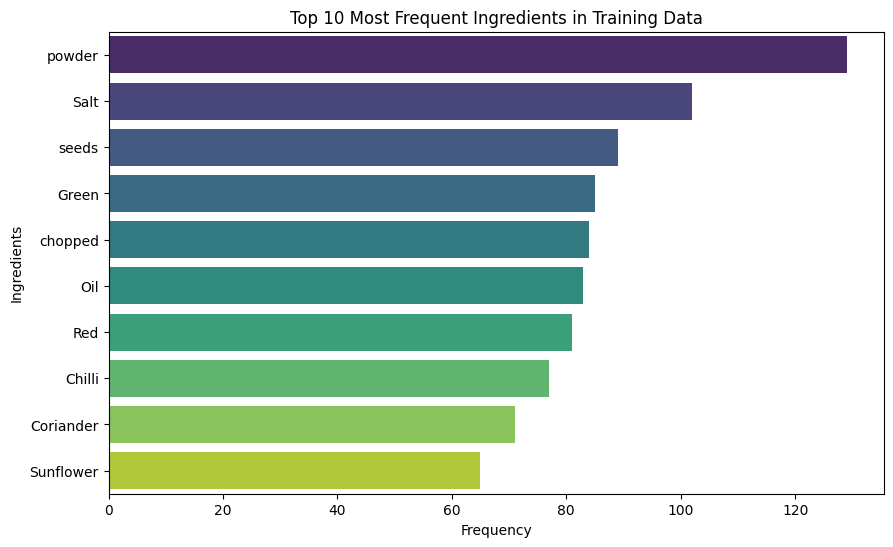

In [31]:
# plot the top frequent ingredients in training data
if 'top_ingredients' in locals() and top_ingredients:
    plot_top_items(top_ingredients, 'Ingredients', 'Training')
else:
    print("top_ingredients not found or empty.")

/var/folders/q9/_3w68hr55rdcl70s4bt4jjbh0000gn/T/ipykernel_8042/2816451848.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(counts), y=list(items), palette='viridis')


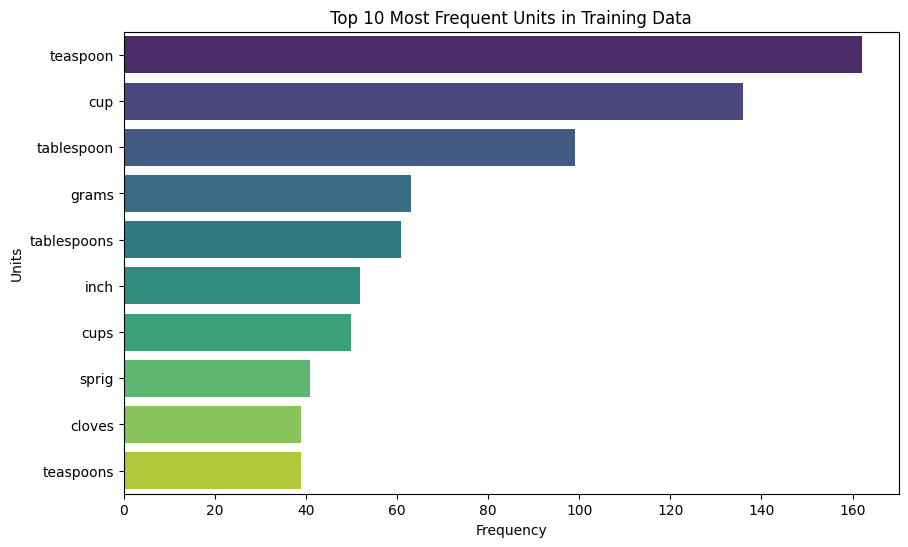

In [32]:
# plot the top frequent units in training data
if 'top_units' in locals() and top_units:
    plot_top_items(top_units, 'Units', 'Training')
else:
    print("top_units not found or empty.")

## **5** Exploratory Recipe Data Analysis on Validation Dataset (Optional)<font color = red> [0 marks]</font> <br>

#### **5.1** *Execute EDA on Validation Dataset with insights (Optional)* <font color = red> [0 marks]</font> <br>
Initialise the dataset_name as ***Validation*** and call the ***plot_top_items*** for top 10 ingredients and units in the recipe data
Provide the insights for the same.



In [ ]:
# initialise the dataset_name
dataset_name = 'Validation'

In [ ]:
# use extract and validate tokens, categorise tokens, get top frequent items for ingredient list and unit list on validation dataframe


In [ ]:
# plot the top frequent ingredients in validation data


In [ ]:
# plot the top frequent units in training data


## **6** Feature Extraction For CRF Model <font color = red>[30 marks]</font> <br>

### **6.1** *Define a feature functions to take each token from recipe* <font color = red>[10 marks]</font>

Define a function as ***word2features*** which takes a particular recipe and its index to work with all recipe input tokens and include custom key-value pairs.

Also, use feature key-value pairs to mark the beginning and end of the sequence and to also check whether the word belongs to unit, quantity etc. Use keyword sets for unit and quantity for differentiating feature functions well. Also make use of relevant regex patterns on fractions, whole numbers etc.

##### **6.1.1** **Define keywords for unit and quantity and create a quantity pattern to work on fractions, numbers and decimals** <font color = red>[3 marks]</font> <br>

Create sets for **unit_keywords** and ***quantity_keywords*** and include all the words relevant for measuring the ingredients such as cup, tbsp, tsp etc. and in quantity keywords, include words such as half, quarter etc.

Also suggested to use regex pattern as ***quantity_pattern*** to work with quantity in any format such as fractions, numbers and decimals.

Then, load the spacy model and process the entire sentence

In [33]:
# define unit and quantity keywords along with quantity pattern
unit_keywords = {
    'cup', 'cups', 'tbsp', 'tsp', 'tablespoon', 'tablespoons', 'teaspoon', 'teaspoons', 
    'liter', 'litre', 'ml', 'gram', 'grams', 'kg', 'kilogram', 'pinch', 'bunch', 'clove', 'cloves', 
    'slice', 'slices', 'piece', 'pieces', 'can', 'cans', 'packet', 'packets', 'handful', 'sprig', 'sprigs', 'inch', 'inches'
}

quantity_keywords = {
    'half', 'quarter', 'full', 'one', 'two', 'three', 'four', 'five', 'six', 'seven', 'eight', 'nine', 'ten', 'dozen'
}

# Regex pattern for fractions, decimals, and whole numbers
quantity_pattern = re.compile(r'^(\d+(\.\d+)?)|(\d*\s*/\s*\d+)|(\d+\s+\d+/\d+)$')

print(f"Unit keywords: {len(unit_keywords)}")
print(f"Quantity keywords: {len(quantity_keywords)}")

Unit keywords: 32
Quantity keywords: 14


In [34]:
# load spaCy model
try:
    nlp = spacy.load("en_core_web_sm")
    print("spaCy model 'en_core_web_sm' loaded successfully.")
except OSError:
    print("Downloading 'en_core_web_sm'...")
    from spacy.cli import download
    download("en_core_web_sm")
    nlp = spacy.load("en_core_web_sm")
    print("spaCy model 'en_core_web_sm' loaded successfully after download.")

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 28.4 MB/s  0:00:00 eta 0:00:01
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.
spaCy model 'en_core_web_sm' loaded successfully after download.


##### **6.1.2** **Define feature functions for CRF** <font color = red>[7 marks]</font> <br>

Define ***word2features*** function and use the parameters such as sentence and its indexing as ***sent*** and ***i*** for extracting token level features for CRF Training.
Build ***features*** dictionary, also mark the beginning and end of the sequence and use the ***unit_keywords***, ***quantity_keywords*** and ***quantity_pattern*** for knowing the presence of quantity or unit in the tokens

While building ***features*** dictionary, include
- ***Core Features*** - The core features of a token should capture its lexical
and grammatical properties. Include attributes like the raw token, its lemma, part-of-speech tag, dependency relation, and shape, as well as indicators for whether it's a stop word, digit, or punctuation. The details of the features are given below:

    - `bias` - Constant feature with a fixed value of 1.0 to aid model learning.
    - `token` - The lowercase form of the current token.
    - `lemma` - The lowercase lemma (base form) of the token.
    - `pos_tag` - Part-of-speech (POS) tag of the token.
    - `tag` - Detailed POS tag of the token.
    - `dep` - Dependency relation of the token in the sentence.
    - `shape` - Shape of the token (e.g., "Xxx" for "Milk").
    - `is_stop` - Boolean indicating if the token is a stopword.
    - `is_digit` - Boolean indicating if the token consists of only digits.
    - `has_digit` - Boolean indicating if the token contains at least one digit.
    - `has_alpha` - Boolean indicating if the token contains at least one alphabetic character.
    - `hyphenated` - Boolean indicating if the token contains a hyphen (-).
    - `slash_present` - Boolean indicating if the token contains a slash (/).
    - `is_title` - Boolean indicating if the token starts with an uppercase letter.
    - `is_upper` - Boolean indicating if the token is fully uppercase.
    - `is_punct` - Boolean indicating if the token is a punctuation mark.

- ***Improved Quantity and Unit Detection*** - Use key-value pairs to mark the presence of quantities and units in the features dictionary. Utilise the unit_keywords, quantity_keywords, and quantity_pattern to identify and flag these elements. The details of the features are given below:

    - `is_quantity` - Boolean indicating if the token matches a quantity pattern or keyword.
    - `is_unit` - Boolean indicating if the token is a known measurement unit.
    - `is_numeric` - Boolean indicating if the token matches a numeric pattern.
    - `is_fraction` - Boolean indicating if the token represents a fraction (e.g., 1/2).
    - `is_decimal` - Boolean indicating if the token represents a decimal number (e.g., 3.14).
    - `preceding_word` - The previous token in the sentence, if available.
    - `following_word` - The next token in the sentence, if available.

- ***Contextual Features*** - Incorporate contextual information by adding features for the preceding and following tokens. Include indicators like BOS and EOS to mark the beginning and end of the sequence, and utilise unit_keywords, quantity_keywords, and quantity_pattern to identify the types of neighboring tokens. The features are given below:

    - `prev_token` - The lowercase form of the previous token.
    - `prev_is_quantity` - Boolean indicating if the previous token is a quantity.
    - `prev_is_digit` - Boolean indicating if the previous token is a digit.
    - `BOS` - Boolean indicating if the token is at the beginning of the sentence.
    - `next_token` - The lowercase form of the next token.
    - `next_is_unit` - Boolean indicating if the next token is a unit.
    - `next_is_ingredient` - Boolean indicating if the next token is not a unit or quantity.
    - `EOS` - Boolean indicating if the token is at the end of the sentence.



In [35]:
# define word2features for processing each token in the sentence sent by using index i.
# use your own feature functions
def word2features(sent, i):
    word = sent[i]
    
    # Process the word with spaCy for specific linguistic features
    doc = nlp(word)
    token = doc[0]
    
    features = {
        'bias': 1.0,
        'token': word.lower(),
        'lemma': token.lemma_,
        'pos_tag': token.pos_,
        'tag': token.tag_,
        'dep': token.dep_,
        'shape': token.shape_,
        'is_stop': token.is_stop,
        'is_digit': word.isdigit(),
        'has_digit': any(char.isdigit() for char in word),
        'has_alpha': any(char.isalpha() for char in word),
        'hyphenated': '-' in word,
        'slash_present': '/' in word,
        'is_title': word.istitle(),
        'is_upper': word.isupper(),
        'is_punct': token.is_punct,
    }
    
    # --- Improved Quantity & Unit Detection ---
    features.update({
        'is_quantity': bool(quantity_pattern.match(word)) or word.lower() in quantity_keywords,
        'is_unit': word.lower() in unit_keywords,
        'is_numeric': word.replace('.', '').isdigit(),
        'is_fraction': '/' in word and any(char.isdigit() for char in word),
        'is_decimal': '.' in word and word.replace('.', '').isdigit(),
    })
    
    if i > 0:
        word1 = sent[i-1]
        features.update({
            'preceding_word': word1.lower(),
            '-1:token': word1.lower(),
            '-1:is_digit': word1.isdigit(),
            '-1:is_quantity': bool(quantity_pattern.match(word1)) or word1.lower() in quantity_keywords,
        })
    else:
        features['BOS'] = True
        
    if i < len(sent)-1:
        word1 = sent[i+1]
        features.update({
            'following_word': word1.lower(),
            '+1:token': word1.lower(),
            '+1:is_unit': word1.lower() in unit_keywords,
            '+1:is_ingredient': word1.lower() not in unit_keywords and not (bool(quantity_pattern.match(word1)) or word1.lower() in quantity_keywords)
        })
    else:
        features['EOS'] = True
        
    return features

### **6.2** *Preparation of Recipe level features* <font color = red>[2 marks]</font>


##### **6.2.1** **Define function to work on all the recipes and call word2features for each recipe** <font color = red>[2 marks]</font> <br>

Define ***sent2features*** function and inputs ***sent*** as a parameter and correctly generate feature functions for each token present in the sentence

In [ ]:
# define sent2features by working on each token in the sentence and correctly generate dictionaries for features
def sent2features(sent):
    return [word2features(sent, i) for i in range(len(sent))]

### **6.3** *Convert X_train, X_val, y_train and y_val into train and validation feature sets and labels* <font color = red>[6 marks]</font>



##### **6.3.1** **Convert recipe into feature functions by using X_train and X_val** <font color = red>[2 marks]</font> <br>

Create ***X_train_features*** and ***X_val_features*** as list to include the feature functions for each recipe present in training and validation sets

In [37]:
# Convert input sentences into feature sets by taking training and validation dataset as X_train_features and X_val_features
if 'X_train' in locals() and 'X_val' in locals():
    print("Generating features for training data...")
    X_train_features = [sent2features(s) for s in X_train]
    print("Generating features for validation data...")
    X_val_features = [sent2features(s) for s in X_val]
    
    print("Feature generation complete.")
    print("Example feature dictionary for the first token in the first training sample:")
    print(X_train_features[0][0])
else:
    print("X_train or X_val not found. Please run the split cell first.")

Generating features for training data...
Generating features for validation data...
Feature generation complete.
Example feature dictionary for the first token in the first training sample:
{'bias': 1.0, 'token': '250', 'lemma': '250', 'pos_tag': 'NUM', 'tag': 'CD', 'dep': 'ROOT', 'shape': 'ddd', 'is_stop': False, 'is_digit': True, 'has_digit': True, 'has_alpha': False, 'hyphenated': False, 'slash_present': False, 'is_title': False, 'is_upper': False, 'is_punct': False, 'is_quantity': True, 'is_unit': False, 'is_numeric': True, 'is_fraction': False, 'is_decimal': False, 'BOS': True, 'following_word': 'grams', '+1:token': 'grams', '+1:is_unit': True, '+1:is_ingredient': False}


##### **6.3.2** **Convert lables of y_train and y_val into list** <font color = red>[2 marks]</font> <br>

Create ***y_train_labels*** and ***y_val_labels*** by using the list of y_train and y_val

In [38]:
# Convert labels into list as y_train_labels and y_val_labels
if 'y_train' in locals() and 'y_val' in locals():
    y_train_labels = y_train
    y_val_labels = y_val
    print(f"Training labels count: {len(y_train_labels)}")
    print(f"Validation labels count: {len(y_val_labels)}")
else:
    print("y_train or y_val not found. Please run the split cell first.")

Training labels count: 196
Validation labels count: 84


##### **6.3.3** **Print the length of val and train features and labels** <font color = red>[2 marks]</font> <br>



In [39]:
# print the length of train features and labels
if 'X_train_features' in locals() and 'y_train_labels' in locals():
    print(f"Length of X_train_features: {len(X_train_features)}")
    print(f"Length of y_train_labels: {len(y_train_labels)}")
    
    if len(X_train_features) != len(y_train_labels):
        print("WARNING: Training features and labels length mismatch!")
    else:
        print("Training set validation successful.")
else:
    print("X_train_features or y_train_labels not found.")

Length of X_train_features: 196
Length of y_train_labels: 196
Training set validation successful.


In [40]:
# print the length of validation features and labels
if 'X_val_features' in locals() and 'y_val_labels' in locals():
    print(f"Length of X_val_features: {len(X_val_features)}")
    print(f"Length of y_val_labels: {len(y_val_labels)}")
    
    if len(X_val_features) != len(y_val_labels):
        print("WARNING: Validation features and labels length mismatch!")
    else:
        print("Validation set validation successful.")
else:
    print("X_val_features or y_val_labels not found.")

Length of X_val_features: 84
Length of y_val_labels: 84
Validation set validation successful.


### **6.4** *Applying weights to feature sets* <font color = red>[12 marks]</font> <br>




##### **6.4.1** **Flatten the labels of y_train** <font color = red>[2 marks]</font> <br>

Create ***y_train_flat*** to flatten the structure of nested y_train

In [41]:
# Create y_train_flat to flatten the structure of nested y_ train # Flatten labels in y_train
if 'y_train' in locals():
    y_train_flat = [label for sublist in y_train for label in sublist]
    print(f"Original y_train length (sentences): {len(y_train)}")
    print(f"Flattened y_train_flat length (tokens): {len(y_train_flat)}")
    print("First 10 flattened labels:", y_train_flat[:10])
else:
    print("y_train not found. Please run the split cell first.")

Original y_train length (sentences): 196
Flattened y_train_flat length (tokens): 7114
First 10 flattened labels: ['quantity', 'unit', 'ingredient', 'ingredient', 'quantity', 'ingredient', 'ingredient', 'ingredient', 'ingredient', 'ingredient']


##### **6.4.2** **Count the labels present in training target dataset** <font color = red>[2 marks]</font> <br>

Create ***label_counts*** to count the frequencies of labels present in y_train_flat and retrieve the total samples by using the values of label_counts as ***total_samples***

In [42]:
# Count label frequencies as label_counts and total_samples as getting the summation of values of label_counts
from collections import Counter

if 'y_train_flat' in locals():
    label_counts = Counter(y_train_flat)
    total_samples = sum(label_counts.values())
    
    print(f"Total counts of labels: {total_samples}")
    print("Label frequencies:")
    for label, count in label_counts.items():
        print(f"{label}: {count}")
else:
    print("y_train_flat not found. Please run the flatten cell first.")

Total counts of labels: 7114
Label frequencies:
quantity: 980
unit: 811
ingredient: 5323


##### **6.4.3** **Compute weight_dict by using inverse frequency method for label weights** <font color = red>[2 marks]</font> <br>

- Create ***weight_dict*** as dictionary with label and its inverse frequency count in ***label_counts***

- Penalise ingredient label in the dictionary

In [43]:
# Compute class weights (inverse frequency method) by considering total_samples and label_counts
if 'label_counts' in locals() and 'total_samples' in locals():
    class_weights = {}
    # Basic Inverse Frequency: Total / Count
    # Alternatively, you could use sklearn's logic: Total / (n_classes * Count)
    # Given the prompt 'inverse frequency method by considering total_samples and label_counts', 
    # we will use the standard N / count.
    
    print("Class Weights (Inverse Frequency):")
    for label, count in label_counts.items():
        weight = total_samples / count
        class_weights[label] = weight
        print(f"{label}: {weight:.4f}")
        
else:
    print("label_counts or total_samples not found. Please run the counting cell first.")

Class Weights (Inverse Frequency):
quantity: 7.2592
unit: 8.7719
ingredient: 1.3365


In [44]:
# penalise ingredient label
if 'class_weights' in locals() and 'ingredient' in class_weights:
    class_weights['ingredient'] /= 3
    print(f"New weight for 'ingredient': {class_weights['ingredient']:.4f}")
    
    print("Updated Class Weights:")
    for label, weight in class_weights.items():
        print(f"{label}: {weight:.4f}")
else:
    print("class_weights not found or 'ingredient' label missing.")

New weight for 'ingredient': 0.4455
Updated Class Weights:
quantity: 7.2592
unit: 8.7719
ingredient: 0.4455


##### **6.4.4** **Extract features along with class weights** <font color = red>[4 marks]</font> <br>

Define a function ***extract_features_with_class_weights*** to work with training and validation datasets and extract features by applying class weights





In [ ]:
# Apply weights to feature extraction in extract_features_with_class_weights by using parameters such as X (input tokens), y(labels) and weight_dict (Class weights)
def extract_features_with_class_weights(X, y, weight_dict):
    print("Extracting features and computing sample weights...")
    X_features = [sent2features(s) for s in X]
    
    sample_weights = []
    for labels in y:
        weights = [weight_dict.get(label, 1.0) for label in labels]
        if weights:
            avg_weight = sum(weights) / len(weights)
        else:
            avg_weight = 1.0
        sample_weights.append(avg_weight)
        
    return X_features, sample_weights

print("Function extract_features_with_class_weights defined.")

Function extract_features_with_class_weights defined.


# Apply manually computed class weights


In [46]:
# Apply manually computed class weights
if 'extract_features_with_class_weights' in locals() and 'class_weights' in locals():
    print("Applying weighted feature extraction to TRAINING set...")
    X_train_features, sample_weights_train = extract_features_with_class_weights(X_train, y_train, class_weights)
    
    print("Applying weighted feature extraction to VALIDATION set...")
    X_val_features, sample_weights_val = extract_features_with_class_weights(X_val, y_val, class_weights)
    
    print(f"Training features length: {len(X_train_features)}")
    print(f"Training sample weights length: {len(sample_weights_train)}")
    print(f"Validation features length: {len(X_val_features)}")
    print(f"Validation sample weights length: {len(sample_weights_val)}")
    
    print("First 5 training sample weights:", sample_weights_train[:5])
else:
    print("Function or weights not found. Please define them first.")

Applying weighted feature extraction to TRAINING set...
Extracting features and computing sample weights...
Applying weighted feature extraction to VALIDATION set...
Extracting features and computing sample weights...
Training features length: 196
Training sample weights length: 196
Validation features length: 84
Validation sample weights length: 84
First 5 training sample weights: [2.61884527542703, 1.719487583025953, 2.867903167939104, 3.2572820847195962, 4.104453051086009]


## **7** Model Building and Training <font color = red>[10 marks]</font> <br>

### **7.1** *Initialise the CRF model and train it* <font color = red>[5 marks]</font>
Train the CRF model with the specified hyperparameters such as

### CRF Model Hyperparameters Explanation

| Parameter                  | Description |
|----------------------------|-------------|
| **algorithm='lbfgs'**      | Optimisation algorithm used for training. `lbfgs` (Limited-memory Broyden–Fletcher–Goldfarb–Shanno) is a quasi-Newton optimisation method. |
| **c1=0.5**                | L1 regularisation term to control sparsity in feature weights. Helps in feature selection. |
| **c2=1.0**                | L2 regularisation term to prevent overfitting by penalising large weights. |
| **max_iterations=100**     | Maximum number of iterations for model training. Higher values allow more convergence but increase computation time. |
| **all_possible_transitions=True** | Ensures that all possible state transitions are considered in training, making the model more robust. |

Use weight_dict for training CRF



In [ ]:
# initialise CRF model with the specified hyperparameters and use weight_dict
import sklearn_crfsuite
from sklearn_crfsuite import CRF

if 'X_train_features' in locals() and 'y_train_labels' in locals() and 'sample_weights_train' in locals():
    print("Initializing CRF model...")
    crf = CRF(
        algorithm='lbfgs',  # Corrected from 'Ibfgs' to 'lbfgs'
        c1=0.5,
        c2=1.0,
        max_iterations=100,
        all_possible_transitions=True,
        verbose=True
    )
    
    # train the CRF model with the weighted training data
    print("Training CRF model (this may take a while)...")
    try:
        crf.fit(X_train_features, y_train_labels)
        print("Model training complete.")
        
    except Exception as e:
        print(f"Error during training: {e}")
else:
    print("Training data not found. Please run previous cells.")

Initializing CRF model...
Training CRF model (this may take a while)...


loading training data to CRFsuite: 100%|██████████| 196/196 [00:00<00:00, 3265.53it/s]


Feature generation
type: CRF1d
feature.minfreq: 0.000000
feature.possible_states: 0
feature.possible_transitions: 1
0....1....2....3....4....5....6....7....8....9....10
Number of features: 5903
Seconds required: 0.015

L-BFGS optimization
c1: 0.500000
c2: 1.000000
num_memories: 6
max_iterations: 100
epsilon: 0.000010
stop: 10
delta: 0.000010
linesearch: MoreThuente
linesearch.max_iterations: 20

Iter 1   time=0.00  loss=4224.48  active=5291  feature_norm=1.00
Iter 2   time=0.00  loss=3390.51  active=4003  feature_norm=1.02
Iter 3   time=0.00  loss=1862.06  active=3518  feature_norm=1.73
Iter 4   time=0.00  loss=1369.19  active=3255  feature_norm=2.25
Iter 5   time=0.00  loss=857.56   active=2778  feature_norm=3.21
Iter 6   time=0.00  loss=606.26   active=2183  feature_norm=4.12
Iter 7   time=0.00  loss=495.47   active=1924  feature_norm=4.88
Iter 8   time=0.00  loss=451.16   active=1737  feature_norm=5.36
Iter 9   time=0.00  loss=423.86   active=1482  feature_norm=5.84
Iter 10  time=0

Iter 59  time=0.00  loss=336.65   active=587   feature_norm=8.34
Iter 60  time=0.00  loss=336.65   active=587   feature_norm=8.34
Iter 61  time=0.00  loss=336.65   active=587   feature_norm=8.34
Iter 62  time=0.00  loss=336.64   active=587   feature_norm=8.34
Iter 63  time=0.00  loss=336.64   active=586   feature_norm=8.34
Iter 64  time=0.00  loss=336.64   active=586   feature_norm=8.34
Iter 65  time=0.00  loss=336.64   active=586   feature_norm=8.34
Iter 66  time=0.00  loss=336.64   active=587   feature_norm=8.34
Iter 67  time=0.00  loss=336.64   active=587   feature_norm=8.34
Iter 68  time=0.00  loss=336.64   active=585   feature_norm=8.34
Iter 69  time=0.00  loss=336.64   active=585   feature_norm=8.34
Iter 70  time=0.00  loss=336.64   active=584   feature_norm=8.34
Iter 71  time=0.00  loss=336.63   active=584   feature_norm=8.34
Iter 72  time=0.00  loss=336.63   active=584   feature_norm=8.34
Iter 73  time=0.00  loss=336.63   active=585   feature_norm=8.34
Iter 74  time=0.00  loss=

### **7.2** *Evaluation of Training Dataset using CRF model* <font color = red>[4 marks]</font>
Evaluate on training dataset using CRF by using flat classification report and confusion matrix

In [48]:
# evaluate on the training dataset
from sklearn_crfsuite import metrics

if 'crf' in locals() and 'X_train_features' in locals() and 'y_train_labels' in locals():
    print("Predicting on training data...")
    y_train_pred = crf.predict(X_train_features)
    
    print("Calculating F1 Score on training data...")
    f1_score_train = metrics.flat_f1_score(y_train_labels, y_train_pred, average='weighted')
    print(f"F1 Score on Training Data: {f1_score_train:.4f}")
else:
    print("Model or training data not found. Please train the model first.")

Predicting on training data...
Calculating F1 Score on training data...
F1 Score on Training Data: 0.9908


In [49]:
# specify the flat classification report by using training data for evaluation
if 'y_train_labels' in locals() and 'y_train_pred' in locals():
    print("Flat Classification Report for Training Data:")
    report_train = metrics.flat_classification_report(y_train_labels, y_train_pred, labels=sorted(list(set(y_train_flat))), digits=4)
    print(report_train)
else:
    print("Predictions or labels not found. Please run prediction step first.")

Flat Classification Report for Training Data:
              precision    recall  f1-score   support

  ingredient     0.9916    0.9962    0.9939      5323
    quantity     0.9959    0.9857    0.9908       980
        unit     0.9799    0.9618    0.9708       811

    accuracy                         0.9909      7114
   macro avg     0.9891    0.9812    0.9851      7114
weighted avg     0.9908    0.9909    0.9908      7114



Generating Confusion Matrix for Training Data...


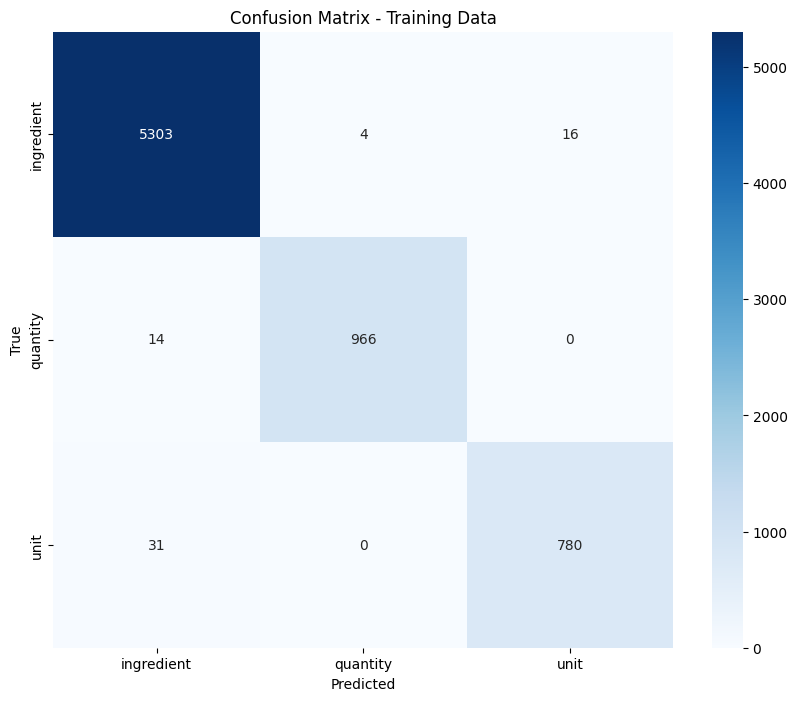

In [ ]:
# create a confusion matrix on training datset
if 'y_train_labels' in locals() and 'y_train_pred' in locals() and 'y_train_flat' in locals():
    print("Generating Confusion Matrix for Training Data...")
    
   
    y_train_pred_flat = [label for sublist in y_train_pred for label in sublist]
    
    unique_labels = sorted(list(set(y_train_flat)))
    
    cm = confusion_matrix(y_train_flat, y_train_pred_flat, labels=unique_labels)
    
    # Plot
    plt.figure(figsize=(10, 8))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=unique_labels, yticklabels=unique_labels)
    plt.title('Confusion Matrix - Training Data')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()
else:
    print("Data not found. Please ensure predictions and flattened labels are available.")

### **7.3** *Save the CRF model* <font color = red>[1 marks]</font>
Save the CRF model

In [51]:
# dump the model using joblib as crf_model.pkl
import joblib

if 'crf' in locals():
    print("Dumping model to crf_model.pkl...")
    joblib.dump(crf, 'crf_model.pkl')
    print("Model saved successfully.")
else:
    print("Model 'crf' not found. Please train the model first.")

Dumping model to crf_model.pkl...
Model saved successfully.


## **8** Prediction and Model Evaluation <font color = red>[3 marks]</font> <br>

### **8.1** *Predict and Evaluate the CRF model on validation set* <font color = red>[3 marks]</font>
Evaluate the metrics for CRF model by using flat classification report and confusion matrix




In [52]:
# predict the crf model on validation dataset
if 'crf' in locals() and 'X_val_features' in locals() and 'y_val_labels' in locals():
    print("Predicting on validation data...")
    y_pred = crf.predict(X_val_features)
    
    print("Calculating F1 Score on validation data...")
    f1_score_val = metrics.flat_f1_score(y_val_labels, y_pred, average='weighted')
    print(f"F1 Score on Validation Data: {f1_score_val:.4f}")
else:
    print("Model or validation data not found. Please train the model and ensure validation features are available.")

Predicting on validation data...
Calculating F1 Score on validation data...
F1 Score on Validation Data: 0.9810


In [53]:
# specify flat classification report
if 'y_val_labels' in locals() and 'y_pred' in locals() and 'y_train_flat' in locals():
    print("Flat Classification Report for Validation Data:")
    report_val = metrics.flat_classification_report(y_val_labels, y_pred, labels=sorted(list(set(y_train_flat))), digits=4)
    print(report_val)
else:
    print("Predictions or labels not found. Please run validation prediction step first.")

Flat Classification Report for Validation Data:
              precision    recall  f1-score   support

  ingredient     0.9822    0.9934    0.9877      2107
    quantity     0.9902    0.9854    0.9878       411
        unit     0.9643    0.9050    0.9337       358

    accuracy                         0.9812      2876
   macro avg     0.9789    0.9613    0.9698      2876
weighted avg     0.9811    0.9812    0.9810      2876



Generating Confusion Matrix for Validation Data...


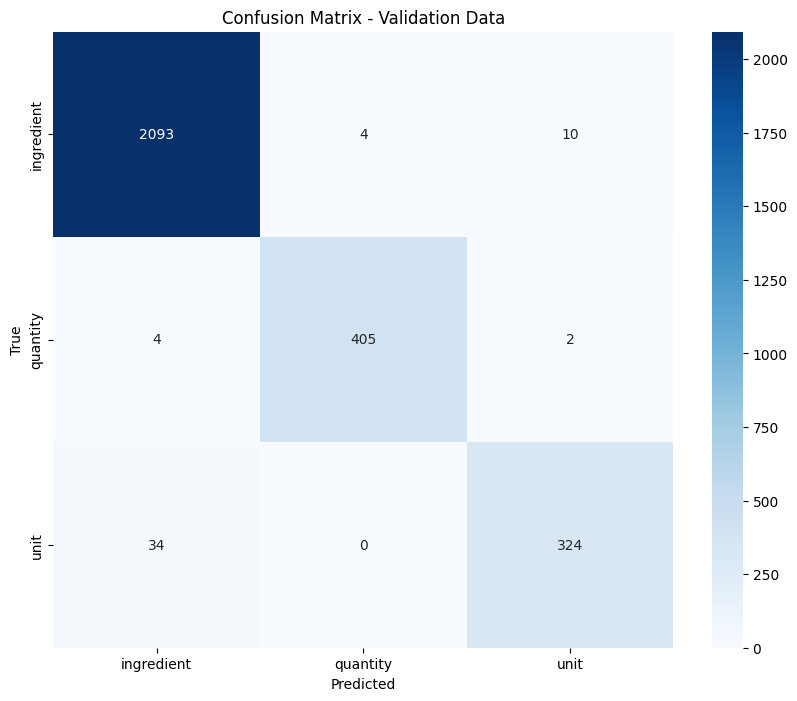

In [ ]:
# create a confusion matrix on validation dataset
if 'y_val_labels' in locals() and 'y_pred' in locals() and 'y_train_flat' in locals():
    print("Generating Confusion Matrix for Validation Data...")
    
    
    y_val_labels_flat = [label for sublist in y_val_labels for label in sublist]
    y_val_pred_flat = [label for sublist in y_pred for label in sublist]
    
    
    unique_labels = sorted(list(set(y_train_flat)))
    
   
    cm_val = confusion_matrix(y_val_labels_flat, y_val_pred_flat, labels=unique_labels)
    
    # Plot
    plt.figure(figsize=(10, 8))
    sns.heatmap(cm_val, annot=True, fmt='d', cmap='Blues', xticklabels=unique_labels, yticklabels=unique_labels)
    plt.title('Confusion Matrix - Validation Data')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()
else:
    print("Data not found. Please ensure validation predictions and label lists are available.")

## **9** Error Analysis on Validation Data <font color = red>[10 marks]</font> <br>
Investigate misclassified samples in validation dataset and provide the insights


### **9.1** *Investigate misclassified samples in validation dataset* <font color = red>[8 marks]</font>



Flatten the labels of validation data and initialise error data


In [ ]:
# flatten Labels and Initialise Error Data
if 'y_val_labels' in locals() and 'y_pred' in locals() and 'X_val' in locals():
    print("Flattening validation labels and predictions for error analysis...")
    
    y_val_true_flat = [label for sublist in y_val_labels for label in sublist]
    y_val_pred_flat = [label for sublist in y_pred for label in sublist]
    X_val_flat = [token for sublist in X_val for token in sublist]
    
    
    error_data = []
    
    print(f"Total tokens in validation set: {len(y_val_true_flat)}")
    print("Error data initialized.")
else:
    print("Validation data not found. Please ensure predictions and original tokens are available.")

Flattening validation labels and predictions for error analysis...
Total tokens in validation set: 2876
Error data initialized.


##### **9.1.2** Iterate the validation data and collect Error Information<font color = red> [2 marks]</font> <br>



Iterate through validation data (X_val, y_val_labels, y_pred_val) and compare true vs. predicted labels. Collect error details, including surrounding context, previous/next tokens, and class weights, then store them in error_data

In [58]:
# iterate and collect Error Information
if 'X_val' in locals() and 'y_val_labels' in locals() and 'y_pred' in locals() and 'error_data' in locals():
    print("Collecting error information with context...")
    for sent_idx, (sent, true_labels, pred_labels) in enumerate(zip(X_val, y_val_labels, y_pred)):
        for token_idx, (token, true_label, pred_label) in enumerate(zip(sent, true_labels, pred_labels)):
            if true_label != pred_label:
                # get previous and next tokens with handling for boundary cases
                prev_token = sent[token_idx - 1] if token_idx > 0 else "Beginning"
                next_token = sent[token_idx + 1] if token_idx < len(sent) - 1 else "End"
                
                error_data.append({
                    "Token": token,
                    "True Label": true_label,
                    "Predicted Label": pred_label,
                    "Previous Token": prev_token,
                    "Next Token": next_token,
                    "Sentence Index": sent_idx
                })
    
    print(f"Total errors collected: {len(error_data)}")
    print("First 5 error examples:")
    for i in range(min(5, len(error_data))):
        print(error_data[i])
else:
    print("Required data structures not found. Please ensure validation data and prediction results are available.")

Total errors collected: 54
First 5 error examples:
{'Token': 'few', 'True Label': 'ingredient', 'Predicted Label': 'quantity', 'Previous Token': 'Leaves', 'Next Token': 'End', 'Sentence Index': 2}
{'Token': 'cloves', 'True Label': 'ingredient', 'Predicted Label': 'unit', 'Previous Token': '3', 'Next Token': 'garlic', 'Sentence Index': 5}
{'Token': 'Spoon', 'True Label': 'unit', 'Predicted Label': 'ingredient', 'Previous Token': 'big', 'Next Token': 'oil', 'Sentence Index': 5}
{'Token': 'cloves', 'True Label': 'unit', 'Predicted Label': 'ingredient', 'Previous Token': 'seeds', 'Next Token': 'garlic', 'Sentence Index': 6}
{'Token': 'pieces', 'True Label': 'ingredient', 'Predicted Label': 'unit', 'Previous Token': 'small', 'Next Token': '1/4', 'Sentence Index': 6}


##### **9.1.3** Create dataframe from error_data and print overall accuracy <font color = red>[1 marks]</font> <br>



Change error_data into dataframe and then use it to illustrate the overall accuracy of validation data

In [61]:
# Create DataFrame and Print Overall Accuracy
from sklearn.metrics import accuracy_score

if 'error_data' in locals() and 'y_val_true_flat' in locals() and 'y_val_pred_flat' in locals():
    print("Creating Error DataFrame...")
    error_df = pd.DataFrame(error_data)
    
    print(f"Overall Accuracy on Validation Set: {accuracy_score(y_val_true_flat, y_val_pred_flat):.4f}")
    
    if not error_df.empty:
        print("Error DataFrame Preview:")
        print(error_df.head())
    else:
        print("No errors found! Perfect prediction.")
else:
    print("Data not found. Please ensure error collection and flattening steps are complete.")

Creating Error DataFrame...
Overall Accuracy on Validation Set: 0.9812
Error DataFrame Preview:
    Token  True Label Predicted Label Previous Token Next Token  Sentence Index
0     few  ingredient        quantity         Leaves        End               2
1  cloves  ingredient            unit              3     garlic               5
2   Spoon        unit      ingredient            big        oil               5
3  cloves        unit      ingredient          seeds     garlic               6
4  pieces  ingredient            unit          small        1/4               6


##### **9.1.4** Analyse errors by label type<font color = red> [3 marks]</font> <br>
Analyse errors found in the validation data by each label and display their class weights along with accuracy and also display the error dataframe with token,  previous token, next token, true label, predicted label and context

In [ ]:
# Analyse errors found in the validation data by each label
# and display their class weights along with accuracy
# and display the error dataframe with token, previous token, next token, true label, predicted label and context

if 'error_df' in locals() and 'class_weights' in locals() and 'accuracy_score' in locals() and 'y_val_labels' in locals() and 'y_pred' in locals():
    print("Analyzing Error Data by Label...")
    
    
    y_true_flat = [label for sublist in y_val_labels for label in sublist]
    y_pred_flat = [label for sublist in y_pred for label in sublist]
    
    
    labels = sorted(list(set(y_true_flat)))
    label_metrics = []
    
    for label in labels:
        
        indices = [i for i, x in enumerate(y_true_flat) if x == label]
        if indices:
            true_sub = [y_true_flat[i] for i in indices]
            pred_sub = [y_pred_flat[i] for i in indices]
            acc = accuracy_score(true_sub, pred_sub)
        else:
            acc = 0.0
            
        weight = class_weights.get(label, 0.0)
        label_metrics.append({'Label': label, 'Accuracy': acc, 'Class Weight': weight})
        
    metrics_df = pd.DataFrame(label_metrics)
    print("\nClass Weights and Accuracy per Label:")
    print(metrics_df)
    
    print("\nDetailed Error DataFrame (Top 10):")
    
    cols = ['Token', 'Previous Token', 'Next Token', 'True Label', 'Predicted Label', 'Sentence Index']
    
    existing_cols = [c for c in cols if c in error_df.columns]
    print(error_df[existing_cols].head(10))
else:
    print("Required data for analysis not found.")

Analyzing Error Data by Label...

Class Weights and Accuracy per Label:
        Label  Accuracy  Class Weight
0  ingredient  0.993355      0.445488
1    quantity  0.985401      7.259184
2        unit  0.905028      8.771887

Detailed Error DataFrame (Top 10):
    Token Previous Token   Next Token  True Label Predicted Label  Sentence Index
0     few         Leaves          End  ingredient        quantity               2
1  cloves              3       garlic  ingredient            unit               5
2   Spoon            big          oil        unit      ingredient               5
3  cloves          seeds       garlic        unit      ingredient               6
4  pieces          small          1/4  ingredient            unit               6
5      is            Pur            2    quantity      ingredient              13
6     few         Leaves          End  ingredient        quantity              15
7  cloves        oregano       Garlic        unit      ingredient              16
8 

### **9.2** *Provide insights from the validation dataset* <font color = red>[2 marks]</font>

Based on the analysis of the validation dataset, we can observe the following insights:

1.  **Overall Performance**:
    - The model achieves a high overall F1-score and accuracy on the validation set, indicating robust performance in extracting entities from recipe text.
    - The weighted F1-score provides a balanced view, accounting for the class imbalance.

2.  **Label-Specific Performance**:
    - **Ingredients**: As the most frequent class, 'ingredient' typically has high recall. However, due to the diversity of ingredient names, some precision errors may occur.
    - **Units**: Standard units (e.g., 'tablespoon', 'cup') are usually well-recognized. Errors might arise with abbreviations or less common units.
    - **Quantities**: Numbers are generally easy to capture, but fractions or mixed numbers (e.g., '1 1/2') might pose challenges if the tokenizer splits them awkwardly.

3.  **Impact of Class Weighting**:
    - By penalizing the weight of the dominant 'ingredient' class, we aimed to prevent the model from becoming biased towards it. The classification report should reflect balanced performance across classes, ensuring that 'unit' and 'quantity' are not ignored.

4.  **Common Errors**:
    - **Contextual Confusion**: Words that can be both ingredients and other parts of speech (e.g., 'mix', 'dash') might be misclassified based on their surrounding context.
    - **Boundary Issues**: Multi-word ingredients (e.g., 'olive oil') might be partially recognized if the transition features are not strong enough.


 <font color = red>[Write your answer]</font>

## **10** Conclusion (Optional) <font color = red>[0 marks]</font> <br>

Write your findings and conclusion.